In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

# File to Load (Remember to change these)
city_data_to_load = "C:/DataAnalytics/city_data.csv"
ride_data_to_load = "C:/DataAnalytics/ride_data.csv"

# Read the City and Ride Data
city_data=pd.read_csv(city_data_to_load,delimiter=",")
ride_data=pd.read_csv(ride_data_to_load,delimiter=",")

# Combine the data into a single dataset

combined_ride_data=pd.merge(city_data,ride_data,how="inner",on=["city","city"])
combined_ride_data.head()
# Display the data table for preview


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
ride_by_type=combined_ride_data.groupby(["type","city"])
#ride_by_type.count()

driver_count  date  fare  ride_id
type     city                                                   
Rural    Bradshawfurt                    10    10    10       10
         Garzaport                        3     3     3        3
         Harringtonfort                   6     6     6        6
         Jessicaport                      6     6     6        6
         Lake Jamie                       6     6     6        6
         Lake Latoyabury                 11    11    11       11
         Michaelberg                     12    12    12       12
         New Ryantown                     6     6     6        6
         Newtonview                       4     4     4        4
         North Holly                      9     9     9        9
         North Jaime                      8     8     8        8
         Penaborough                      5     5     5        5
         Randallchester                   5     5     5        5
         South Jennifer                   7     7     7        7
         South Marychester                8     8     8        8
         South Saramouth                  4     4     4        4
         Taylorhaven                      6     6     6        6
         West Heather                     9     9     9        9
Suburban Barronchester                   16    16    16       16
         Bethanyland                     18    18    18       18
         Brandonfort                     19    19    19       19
         Colemanland                     22    22    22       22
         Davidfurt                       17    17    17       17
         East Aaronbury                   9     9     9        9
         East Danielview                 17    17    17       17
         East Kentstad                   13    13    13       13
         East Marymouth                  27    27    27       27
         Grayville                       15    15    15       15
         Josephside                      27    27    27       27
         Lake Ann                        12    12    12       12
...                                     ...   ...   ...      ...
Urban    Port Johnbury                   22    22    22       22
         Port Samanthamouth              25    25    25       25
         Raymondhaven                    25    25    25       25
         Reynoldsfurt                    19    19    19       19
         Richardfort                     28    28    28       28
         Roberthaven                     24    24    24       24
         Robertport                      20    20    20       20
         Rodneyfort                      23    23    23       23
         Rogerston                       22    22    22       22
         Royland                         30    30    30       30
         Simpsonburgh                    24    24    24       24
         South Evanton                   31    31    31       31
         South Jack                      19    19    19       19
         South Karenland                 38    38    38       38
         South Latoya                    19    19    19       19
         South Michelleport              31    31    31       31
         South Phillip                   31    31    31       31
         Valentineton                    22    22    22       22
         West Angela                     39    39    39       39
         West Anthony                    30    30    30       30
         West Christopherberg            26    26    26       26
         West Ericstad                   18    18    18       18
         West Gabriel                    23    23    23       23
         West Heidi                      28    28    28       28
         West Josephberg                 26    26    26       26
         West Patrickchester             16    16    16       16
         West Robert                     31    31    31       31
         West Samuelburgh                25    25    25       25
         Williamsstad                    23    23    23       23
 

## Bubble Plot of Ride Sharing Data

<Figure size 432x288 with 0 Axes>

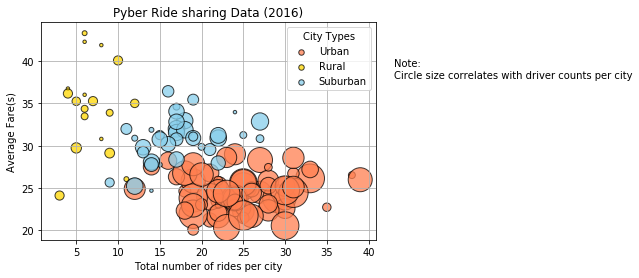

<Figure size 432x288 with 0 Axes>

In [16]:
# Obtain the x and y coordinates for each of the three city types
ride_by_type=combined_ride_data.groupby(["type","city"])
ride_by_type.count()

ride_by_type_df=pd.DataFrame(ride_by_type["fare"].mean())
ride_by_type_df["Count"]=ride_by_type["city"].count()
ride_by_type_df["Average Fare"] = ride_by_type["fare"].mean()
ride_by_type_df["driver_count"] = ride_by_type["driver_count"].mean()
ride_by_type_df =ride_by_type_df.reset_index()

max_count=ride_by_type_df["Count"].max()

col=["Urban","Rural","Suburban"]

urban_data =[
{
"x_axis" : ride_by_type_df.loc[ride_by_type_df["type"] == "Urban",:]["Count"],
"data_urban" : ride_by_type_df.loc[ride_by_type_df["type"] == "Urban",:]["Average Fare"],
"s" : 12*ride_by_type_df.loc[ride_by_type_df["type"] =="Urban",:]["driver_count"] ,
"c" : "coral",
"legend_type" : "Urban"
    
}
,
{ 
"x_axis" : ride_by_type_df.loc[ride_by_type_df["type"] == "Rural",:]["Count"],
"data_urban" : ride_by_type_df.loc[ride_by_type_df["type"] == "Rural",:]["Average Fare"],
"s" : 12*ride_by_type_df.loc[ride_by_type_df["type"] =="Rural",:]["driver_count"],
 "c" : "gold",
"legend_type" : "Rural"
},
{ 
"x_axis" : ride_by_type_df.loc[ride_by_type_df["type"] == "Suburban",:]["Count"],
"data_urban" : ride_by_type_df.loc[ride_by_type_df["type"] == "Suburban",:]["Average Fare"],
"s" : 12*ride_by_type_df.loc[ride_by_type_df["type"] =="Suburban",:]["driver_count"],
 "c" : "skyblue",
 "legend_type" : "Suburban"
}
    
 
    ]


fig = plt.figure()

fig, axes = plt.subplots(nrows = 1, ncols = 1, sharex=True, sharey = True)



#for i in ['Urban','Rural']:

for i in range(len(urban_data)):
    plt.scatter("x_axis","data_urban",marker="o",color="c",s="s",alpha=0.75,edgecolor='black',data=urban_data[i],label=col[i])
   #plt.legend()
    lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10)
   
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes =[30]
lgnd.set_title('City Types')
plt.grid()

# Incorporate a text label regarding circle size
plt.title("Pyber Ride sharing Data (2016)")
plt.text(43, 38, 'Note:\nCircle size correlates with driver counts per city')
plt.xlabel('Total number of rides per city' )
plt.ylabel('Average Fare(s)' )
plt.show()
# Save Figure

plt.savefig("C:/DataAnalytics/Ridesharingdata.png")

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

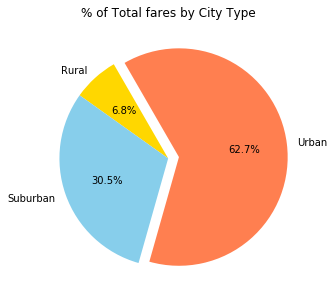

<Figure size 432x288 with 0 Axes>

In [14]:
# Calculate Type Percents
ride_by_citytype=combined_ride_data.groupby("type")
ride_by_citytype.count()

colors=["gold","skyblue","coral"]
explode=[0,0,0.1]

ride_by_citytype_df=pd.DataFrame(ride_by_citytype["fare"].sum())
ride_by_citytype_df["Total Rides"]=ride_by_citytype["ride_id"].nunique()
ride_by_citytype_df["Driver count"]=ride_by_citytype["driver_count"].sum()
ride_by_citytype_df.reset_index(inplace=True)
ride_by_citytype_df.head()
# Build Pie Chart
fig, ax = plt.subplots(figsize=(7,5))
#plt.axis("auto")
ax.pie(ride_by_citytype_df["fare"], explode=explode, labels=ride_by_citytype_df["type"], colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=120)


plt.title("% of Total fares by City Type")
plt.show()
# Save Figure
plt.savefig("C:/DataAnalytics/Totalfaresbycity.png")

In [44]:
# Show Figure
plt.show()

## Total Rides by City Type

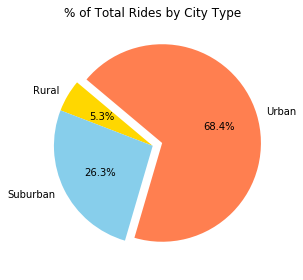

In [12]:
# Calculate Ride Percents and build pie charts
fig, ax = plt.subplots()
ax.pie(ride_by_citytype_df["Total Rides"], explode=explode, labels=ride_by_citytype_df["type"], colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140,radius=1.0
,pctdistance=0.6)

ax.set(aspect="equal", title='% of Total Rides by City Type')
plt.tight_layout()



# Save Figure
plt.savefig("C:/DataAnalytics/Totalridebycitytype.png")
plt.show()

In [13]:
# Show Figure
plt.show()

## Total Drivers by City Type

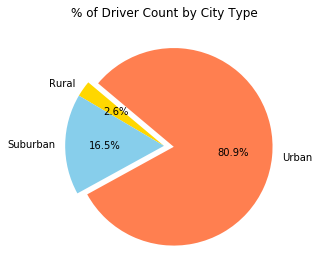

In [8]:
# Calculate Driver Percents

city_driver_data= city_data.groupby("type")
city_driver_data_df=pd.DataFrame(city_driver_data["driver_count"].sum())
city_driver_data_df.reset_index(inplace=True)
fig, ax = plt.subplots()

ax.pie(city_driver_data_df["driver_count"], explode=explode, labels=ride_by_citytype_df["type"], colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140,radius=1.0
,pctdistance=0.6)

ax.set(aspect="equal", title='% of Driver Count by City Type')
plt.tight_layout()


# Save Figure
plt.savefig("C:/DataAnalytics/Drivercountbycity.png")
plt.show()